# "Datascraping using Twitter"
> "Scrapping Tweet data using python"


In [ ]:
!pip install git+https://github.com/tweepy/tweepy.git
!pip install textblob
# !pip install pycountry
# !pip install langdetect
!pip install Sastrawi
!pip install swifter
!pip install itranslate

In [ ]:
#collapse_show
#importing libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
# import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from langdetect import detect
from nltk.stem import SnowballStemmer
nltk.download('vader_lexicon')
nltk.download('stopwords') 
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

To access the Twitter API, we will need 4 things from your Twitter page. These keys are located in your Twitter app settings in the Keys and Access Tokens tab:

- consumer key
- consumer seceret key
- access token key
- access token secret key

[Detailed info for getting keys](https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/)

In [ ]:
#for privacy purposes, these keys are encrypted
consumer_key="{consumer_key}"
consumer_secret="{consumer_secret}"
access_token="{access_token}"
access_token_secret="{access_token_secret}"
bearer_key="{bearer_key}"

Use bearer token. We use this token because we use the new twitter API v2.

In [ ]:
#define client from tweepy

client = tweepy.Client(bearer_token=bearer_key)

One major problem the is being faced is that when we convert a list in data frame, if the tweet text is >50 chars it gets truncated. To solve this issue, we need to set display column width for pandas dataframe to be -1.

In [ ]:
#collapse_show
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


Get tweet mentioning specific query, it is more like search for specific text in a tweet.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount('/content/drive/csv')

Mounted at /content/drive


In [ ]:
query = 'ppkm'

# Replace the limit=1000 with the maximum number of Tweets you want
tweets= tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at']).flatten(limit=300)
tweet_list= [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
#creating dataframe from tweets list
tweets_df1=pd.DataFrame(tweet_list, columns=["Date","Tweet_id","Tweet_Text"])

#download twitter dataset
# file_name = '/content/drive/MyDrive/Colab Notebooks/dataset_ppkm.csv'
# tweets_df.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
query = 'ppkm level 2 OR ppkm level dua'

# Replace the limit=1000 with the maximum number of Tweets you want
tweets= tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at']).flatten(limit=300)
tweet_list= [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
#creating dataframe from tweets list
tweets_df2=pd.DataFrame(tweet_list, columns=["Date","Tweet_id","Tweet_Text"])

#download twitter dataset
# file_name = '/content/drive/MyDrive/Colab Notebooks/dataset_lvl2.csv'
# tweets_df.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
query = 'ppkm level 3 OR ppkm level tiga'

# Replace the limit=1000 with the maximum number of Tweets you want
tweets= tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at']).flatten(limit=300)
tweet_list= [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
#creating dataframe from tweets list
tweets_df3=pd.DataFrame(tweet_list, columns=["Date","Tweet_id","Tweet_Text"])

#download twitter dataset
# file_name = '/content/drive/MyDrive/Colab Notebooks/dataset_lvl3.csv'
# tweets_df.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
query = 'ppkm level 4 OR ppkm level empat'

# Replace the limit=1000 with the maximum number of Tweets you want
tweets= tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', 'created_at']).flatten(limit=300)
tweet_list= [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
#creating dataframe from tweets list
tweets_df4=pd.DataFrame(tweet_list, columns=["Date","Tweet_id","Tweet_Text"])

#combine df
tweets_df = pd.concat([tweets_df1, tweets_df2,tweets_df3,tweets_df4])

#download twitter dataset
# file_name = '/content/drive/MyDrive/Colab Notebooks/csv/dataset_ppkm.csv'
file_name = 'dataset_ppkm.csv'
tweets_df.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
tweets_df.shape

(1100, 3)

In [ ]:
# case folding
tweets_df['Tweet_Text'] = tweets_df['Tweet_Text'].str.lower()
tweets_df.head

<bound method NDFrame.head of                         Date  ...  Tweet_Lang
0  2022-03-03 15:35:34+00:00  ...  None      
1  2022-03-03 15:35:30+00:00  ...  None      
2  2022-03-03 15:34:23+00:00  ...  None      
3  2022-03-03 15:34:10+00:00  ...  None      
4  2022-03-03 15:31:20+00:00  ...  None      
..                       ...  ...   ...      
95 2022-03-03 13:26:04+00:00  ...  None      
96 2022-03-03 13:24:52+00:00  ...  None      
97 2022-03-03 13:24:07+00:00  ...  None      
98 2022-03-03 13:24:04+00:00  ...  None      
99 2022-03-03 13:21:39+00:00  ...  None      

[100 rows x 4 columns]>

In [ ]:
# cleaning text

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(replace.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
tweets_df['Tweet_Text'] = tweets_df['Tweet_Text'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

tweets_df['Tweet_Text'] = tweets_df['Tweet_Text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

tweets_df['Tweet_Text'] = tweets_df['Tweet_Text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

tweets_df['Tweet_Text'] = tweets_df['Tweet_Text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

tweets_df['Tweet_Text'] = tweets_df['Tweet_Text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

tweets_df['Tweet_Text'] = tweets_df['Tweet_Text'].apply(remove_singl_char)

tweets_df['Tweet_Text']

0     rt                                                                                                                                             
1     dah tutup warungnya lagi ppkm                                                                                                                  
2     demi keselamatan masyarakat pemerintah kembali terapkan ppkm untuk menekan penyebaran covid varian omicron prokes ikhtiar bersama              
3     rt sridianava isi chat grup para emak pusing gas bbm sembako naik pusing migor kedelai tahu tempe langka pusing anak sekolah onlin             
4     hafalan doa dan dzikir setelah shalat wkwkwkw tadinya mau sama praktek shalat jenazah alhamdulilah nya gajadi karna ppkm lg                    
                                                                 ...                                                                                 
95    wkwk ok melayu gak usah dibahas lagi wkwk walah sehat ya lu dan semoga orang rumah cepet sembu

In [ ]:
# translate to english before tokenize
from itranslate import itranslate as itrans  

tweetsa = []
for index, row in tweets_df.iterrows():
  tweetsa.append(itrans(row['Tweet_Text'],to_lang='en'))

tweets_df['Tweet_Text_En']=tweetsa
tweets_df['Tweet_Text_En']

0     rt                                                                                                                                                                                 
1     the stall closed again PPKM                                                                                                                                                        
2     For the sake of the safety of the government, the government again implemented the PPKM to suppress the spread of the Covid variant of the Omicron Process of the Joint Brotherhood
3     RT Sridianava Fill Chat Groups Mother Dizziness Gas Fuel Sembako Riding Dizziness Migor Soybean Tofu Tempe Rare Dizziness School Children Online                                   
4     Memorizing Prayer and Dhikr After Prayers Wkwkwkw Want to Practice Prayers Thank God Alhamdulilah Karna Karna PPKM LG                                                              
                                                              ...     

In [ ]:
# tokenizing bahasa
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

tweets_df['Tweet_Tokens'] = tweets_df['Tweet_Text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(tweets_df['Tweet_Tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0    [rt]                                                                                                                                                     
1    [dah, tutup, warungnya, lagi, ppkm]                                                                                                                      
2    [demi, keselamatan, masyarakat, pemerintah, kembali, terapkan, ppkm, untuk, menekan, penyebaran, covid, varian, omicron, prokes, ikhtiar, bersama]       
3    [rt, sridianava, isi, chat, grup, para, emak, pusing, gas, bbm, sembako, naik, pusing, migor, kedelai, tahu, tempe, langka, pusing, anak, sekolah, onlin]
4    [hafalan, doa, dan, dzikir, setelah, shalat, wkwkwkw, tadinya, mau, sama, praktek, shalat, jenazah, alhamdulilah, nya, gajadi, karna, ppkm, lg]          
Name: Tweet_Tokens, dtype: object






In [ ]:
# tokenizing english, we call this dataset_en
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

tweets_df['Tweet_Tokens_en'] = tweets_df['Tweet_Text_En'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(tweets_df['Tweet_Tokens_en'].head())
print('\n\n\n')

Tokenizing Result : 

0    [rt]                                                                                                                                                                                                                 
1    [the, stall, closed, again, PPKM]                                                                                                                                                                                    
2    [For, the, sake, of, the, safety, of, the, government, ,, the, government, again, implemented, the, PPKM, to, suppress, the, spread, of, the, Covid, variant, of, the, Omicron, Process, of, the, Joint, Brotherhood]
3    [RT, Sridianava, Fill, Chat, Groups, Mother, Dizziness, Gas, Fuel, Sembako, Riding, Dizziness, Migor, Soybean, Tofu, Tempe, Rare, Dizziness, School, Children, Online]                                               
4    [Memorizing, Prayer, and, Dhikr, After, Prayers, Wkwkwkw, Want, to, Practice, Prayers, Thank, God

In [ ]:
# translate to english after tokenize, we call this dataset_id_en

tweetsa = []
for index, row in tweets_df.iterrows():
  tweetsa.append(itrans(row['Tweet_Tokens'],to_lang='en'))

tweets_df['Tweet_Tokens_Id_En']=tweetsa
tweets_df['Tweet_Tokens_Id_En']

0     ['rt']                                                                                                                                                                                                                                 
1     ['dah', 'closed', 'stall', 'again', 'ppkm']                                                                                                                                                                                            
2     ['for the sake of', 'safety', 'community', 'government', 'back', 'Apply', 'PPKM', 'for', 'press',' spread ',' Covid ',' variant ',' Omicron ',' Prokes', 'Ikhtiar', 'Together']                                                        
3     ['RT', 'Sridianava', 'Fill', 'Chat', 'Group', 'Para', 'Emak', 'Dizziness',' Gas', 'BBM', 'Sembako', 'Rise', ' dizziness', 'Migor', 'soybean', 'know', 'tempe', 'rare', 'dizziness',' child ',' school ',' online ']                    
4     ['memorization', 'prayer', 'and', 'dhikr',

In [ ]:
# NLTK calc frequency distribution - dataset_id_en
def freqDist_wrapper(text):
    return FreqDist(text)

tweets_df['Tweet_fdist_id_en'] = tweets_df['Tweet_Tokens_Id_En'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(tweets_df['Tweet_fdist_id_en'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(', 2), ([, 1), (r, 1), (t, 1), (], 1)]                                                                                                                                                                                                                                                                               
1    [(', 10), (a, 4), (,, 4), ( , 4), (l, 3), (d, 2), (s, 2), (p, 2), ([, 1), (h, 1), (c, 1), (o, 1), (e, 1), (t, 1), (g, 1), (i, 1), (n, 1), (k, 1), (m, 1), (], 1)]                                                                                                                                                      
2    [(', 32), ( , 22), (,, 15), (r, 10), (e, 10), (o, 9), (t, 7), (a, 7), (s, 6), (n, 5), (i, 5), (f, 4), (k, 4), (m, 4), (p, 4), (h, 3), (y, 3), (c, 3), (v, 3), (P, 3), (g, 2), (d, 2), ([, 1), (u, 1), (b, 1), (A, 1), (l, 1), (K, 1), (M, 1), (C, 1), (O, 1), (I, 1), (T, 1), (], 1)]                                  
3    [(', 44), ( , 25), (,, 

In [ ]:
# NLTK calc frequency distribution - dataset_en
def freqDist_wrapper(text):
    return FreqDist(text)

tweets_df['Tweet_fdist_en'] = tweets_df['Tweet_Text_En'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(tweets_df['Tweet_fdist_en'].head().apply(lambda x : x.most_common()))

In [ ]:
# NLTK Stopword bahasa, we call the rest dataset_id
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
from google.colab import drive
drive.mount('/content/drive')
txt_stopword = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/stopwords.txt', names= ["stopwords"], header = None)
#df1 = df1[['id']]
#df1

#txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

tweets_df['Tweet_WSW_id'] = tweets_df['Tweet_Tokens'].apply(stopwords_removal) 

print(tweets_df['Tweet_WSW_id'].head())

In [ ]:
#normalization
normalizad_word = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/csv/normalization.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

tweets_df['tweet_normalized_id'] = tweets_df['Tweet_WSW_id'].apply(normalized_term)

tweets_df['tweet_normalized_id'].head(10)

In [ ]:
# STEMMING for bahasa
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in tweets_df['tweet_normalized_id']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweets_df['tweet_stemmed_id'] = tweets_df['tweet_normalized_id'].swifter.apply(get_stemmed_term)
print(tweets_df['tweet_stemmed_id'])

In [ ]:
# translate to english after formalized

tweetsa = []
for index, row in tweets_df.iterrows():
  tweetsa.append(itrans(row['tweet_stemmed_id'],to_lang='en'))

tweets_df['tweet_id']=tweetsa
tweets_df['tweet_id']

In [ ]:
#download preprocessed dataset_id
# file_name = '/content/drive/MyDrive/Colab Notebooks/csv/dataset_id_preprocess_PPKM.csv'
file_name = 'dataset_id_preprocess_PPKM.csv'
tweets_df.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
#download preprocessed dataset_id_en
# file_name = '/content/drive/MyDrive/Colab Notebooks/csv/dataset_id_en_preprocess_PPKM.csv'
file_name = 'dataset_id_en_preprocess_PPKM.csv'
tweets_df.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
#download preprocessed dataset_en
# file_name = '/content/drive/MyDrive/Colab Notebooks/csv/dataset_en_preprocess_PPKM.csv'
file_name = 'dataset_en_preprocess_PPKM.csv'
tweets_df.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
#textblob on dataset_id


In [ ]:
#textblob on dataset_id_en
from textblob import TextBlob

for index, row in tweets_df.iterrows():
  tweetsa.append(itrans(row['Tweet_Token_Id_en'],to_lang='en'))

tweets_df['Tweet_Token_En']=tweetsa
tweets_df['Tweet_Token_En']

In [ ]:
#textblob on dataset_en
# def getSubjectivity(text):
#    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
# def getPolarity(text):
#    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 
for index, row in tweets_df.iterrows():
  tweets_df['TextBlob_Subjectivity'] = TextBlob(row['Tweet_Text_En']).sentiment.subjectivity
  tweets_df['TextBlob_Polarity'] = TextBlob(row['Tweet_Text_En']).sentiment.polarity
  if TextBlob(row['Tweet_Text_En']).sentiment.polarity < 0:
    score = 'Negative'
  elif TextBlob(row['Tweet_Text_En']).sentiment.polarity == 0:
    score = 'Neutral'
  else:
    score = 'Positive'
  tweets_df['TextBlob_Analysis'] = score

#df to csv on result
# file_name = '/content/drive/MyDrive/Colab Notebooks/csv/dataset_en_analysis_PPKM.csv'
file_name = 'dataset_en_analysis_PPKM.csv'
tweets_df.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
# vader on dataset_en
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):

	# Create a SentimentIntensityAnalyzer object.
	sid_obj = SentimentIntensityAnalyzer()

	# polarity_scores method of SentimentIntensityAnalyzer
	# object gives a sentiment dictionary.
	# which contains pos, neg, neu, and compound scores.
	sentiment_dict = sid_obj.polarity_scores(sentence)
	
	# decide sentiment as positive, negative and neutral
	if sentiment_dict['compound'] >= 0.05 :
		score = 'Positive'
	elif sentiment_dict['compound'] <= - 0.05 :
		score = 'Negative'
	else :
		score = 'Neutral'
  tweets_df['Vader_Analysis'] = score
  tweets_df['Vader_pos_rate'] = sentiment_dict['pos']
  tweets_df['Vader_neu_rate'] = sentiment_dict['neu']
  tweets_df['Vader_neg_rate'] = sentiment_dict['neg']
 
for index, row in tweets_df.iterrows():
  sentiment_scores(row['Tweet_Text_En'])



________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________



________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________



________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________



________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________



In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = 'lockdown'
noOfTweet = 100
tweets= tweepy.Paginator(client.search_recent_tweets, query=keyword,
                              tweet_fields=['context_annotations', 'created_at']).flatten(limit=noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
  #print(tweet.text)
  tweet_list.append(tweet.text)
  analysis = TextBlob(tweet.text)
  score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity

  if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
  elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
  elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')



TooManyRequests: ignored

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  0
positive number:  0
negative number:  1
neutral number:  0


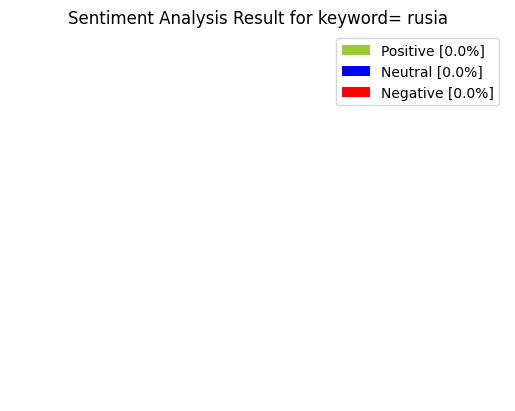

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
file_name = 'tweet_scraped_data.csv'
tweets_df.to_csv(file_name, encoding='utf-8', index=False)

In [ ]:
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
file_name = 'tweet_scraped_data.csv'
tweets.to_csv(file_name, encoding='utf-8', index=False)


# References

[1] http://docs.tweepy.org/en/latest/api.html#status-methods
[2] https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
[3] https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1
[4] https://dev.to/twitterdev/a-comprehensive-guide-for-using-the-twitter-api-v2-using-tweepy-in-python-15d9